# Route Estimator

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

In [2]:
sys.path.append("route_estimator")
sys.path.append("route_estimator/models")
sys.path.append("route_estimator/weather")
sys.path.append("route_estimator/traffic")
from route_estimator import RouteEstimator
from config import Config

 ## Simple Energy Model

In [3]:
simple_model_config = Config()
route_estimator_temp = RouteEstimator(Config(), use_historical=True)
route_estimator_simple_model = RouteEstimator(simple_model_config, graph=route_estimator_temp.get_graph())
route_estimator_simple_model.activate_energy_model()
route_map_simple_e = route_estimator_simple_model.create_map()
route_map_simple_e

Map(center=[41.740563, -111.81391], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

## Statistics of Graph

In [4]:
graphInfoDF = pd.read_csv('graphInfo.csv')
graphInfoDF = graphInfoDF.drop(columns=['Unnamed: 0', 'Transitivity'])
graphInfoDF1 = graphInfoDF.copy()
graphInfoDF1 = graphInfoDF1.drop(columns=['Degree Frequency', 'Degrees'])
graphInfoDF1

,Total No of Nodes,Total No of Edges,Average Degree,Density,Diameter,Average Path Length,Average Clustering Coefficient,Transitivity
0,4952,13067,5.277464,0.000533,89,34.581641,0.039472,0.047326


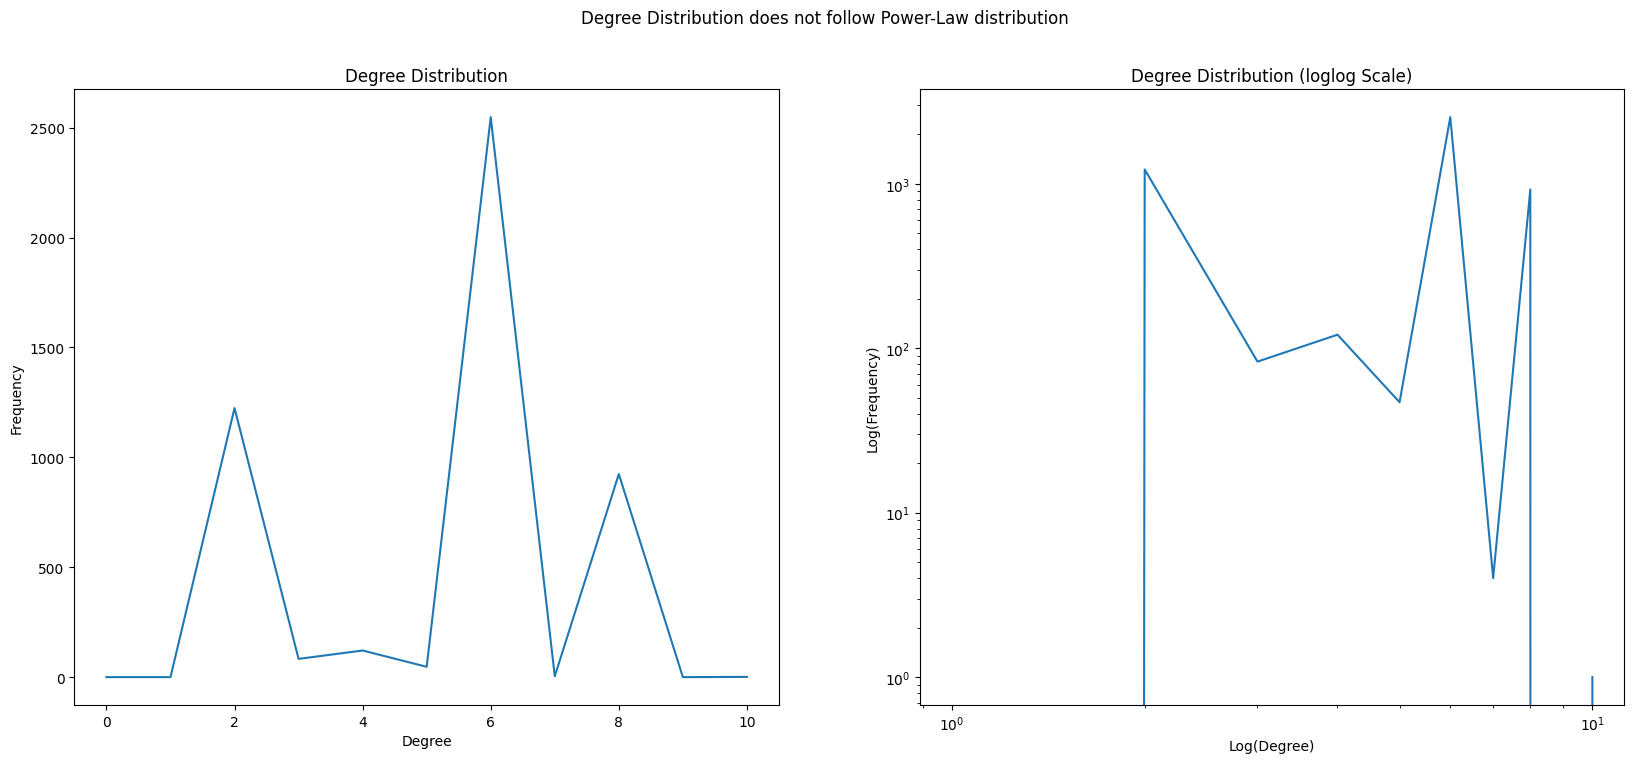

In [5]:
degree_freq1 = graphInfoDF['Degree Frequency']
A = list(degree_freq1)
degree_freq = [eval(i) for i in A]
degree_freq = degree_freq[0]
degrees = range(len(degree_freq))

figure(figsize=(20, 8))
plt.subplot(121)
plt.plot(degrees, degree_freq)
plt.title('Degree Distribution') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.subplot(122)
plt.loglog(degrees, degree_freq)
plt.title('Degree Distribution (loglog Scale)') 
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Frequency)')

plt.suptitle('Degree Distribution does not follow Power-Law distribution')
plt.show()